## 문제 1: 기본적인 선형 회귀 모델
문제: PyTorch를 이용하여 간단한 선형 회귀 모델을 구축하고, 임의의 데이터셋을 사용하여 모델을 학습시켜 보세요. 데이터셋은 1차원 입력과 1차원 출력을 가지도록 생성합니다.

힌트:
- torch를 사용하여 데이터 생성
- torch.nn.Linear 모듈을 사용하여 선형 모델 정의
- 손실 함수로 torch.nn.MSELoss 사용
- 옵티마이저로 torch.optim.SGD 사용

torch.Size([100, 2]) torch.Size([100, 1]) torch.Size([10, 2]) torch.Size([10, 1])


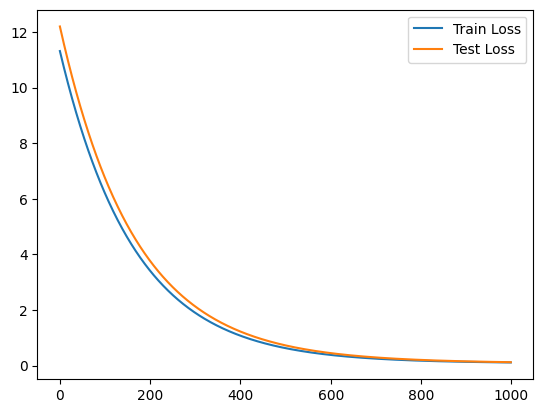

Done...


In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

# Define model
class MyModel(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.fc = nn.Linear(D, 1)
        
    def forward(self, x):
        # x: torch.Size([N1, D])
        return self.fc(x)

# Load data
N1, N2, D = 100, 10, 2
fx = lambda x: (2*x + 1).sum(dim=1).view(-1,1)
X1 = torch.rand(N1, D)
y1 = fx(X1)
X2 = torch.rand(N2, D)
y2 = fx(X2)
print(X1.shape, y1.shape, X2.shape, y2.shape)

model = MyModel(D)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
epochs = 1000
mse1_l = []
mse2_l = []
for _ in range(epochs):
    yp1 = model(X1) 
    mse = loss_fn(yp1, y1)
    mse1_l.append(mse)
    mse.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.no_grad():
        yp2 = model(X2)
        mse = loss_fn(yp2, y2)
        mse2_l.append(mse)
    
#print(mse_l)
mse1_l = [x.item() for x in mse1_l]
mse2_l = [x.item() for x in mse2_l]
plt.plot(mse1_l, label="Train Loss")
plt.plot(mse2_l, label="Test Loss")
plt.legend()
plt.show()

print("Done...")

## 문제 2: 단일 히든 계층을 가진 신경망
이제 히든 계층을 추가하여 모델을 확장해 봅시다.

### 문제 
단일 히든 계층을 가진 신경망을 구축하고, 이전과 같은 데이터셋을 사용하여 모델을 학습시켜 보세요. 히든 계층의 뉴런 수는 10개로 설정합니다.

### 힌트
- torch.nn.Sequential을 사용하여 모델 정의
- 활성화 함수로 torch.nn.ReLU 사용

Weights^T:  tensor([[0.5646, 0.7981, 0.4252, 0.9681, 0.4813, 0.3184, 0.9180, 0.3552, 0.5402,
         0.8345, 0.6034, 0.9810, 0.0121, 0.9030, 0.3137, 0.9682, 0.8080, 0.2834,
         0.1241, 0.5716]])
Bias:  tensor([[0.1654]])
torch.Size([1000, 20]) torch.Size([200, 20]) torch.Size([1000, 1]) torch.Size([200, 1])


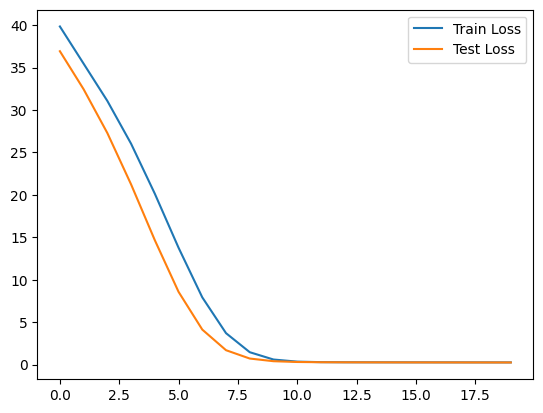

<generator object Module.parameters at 0x7f681818ea40>

In [47]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

N1, N2, D = 1000, 200, 20

wo = torch.rand(D,1)
bo = torch.rand(1,1)
print("Weights^T: ", wo.T)
print("Bias: ", bo)

X1 = torch.rand(N1, D)
X2 = torch.rand(N2, D)
y1 = torch.matmul(X1, wo) + bo
y2 = torch.matmul(X2, wo) + bo
print(X1.shape, X2.shape, y1.shape, y2.shape)

class MyModel(nn.Module):
    def __init__(self, D, H=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D, H),
            nn.ReLU(),
            nn.Linear(H,1)
        )
    def forward(self, x):
        return self.net(x)
    
model = MyModel(D).to(device)
X1 = X1.to(device)
X2 = X2.to(device)
y1 = y1.to(device)
y2 = y2.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

Epochs = 20
loss1_l = []
loss2_l = []
for ep in range(Epochs):
    yp1 = model(X1)
    loss1 = loss_fn(yp1, y1)
    loss1_l.append(loss1)
    loss1.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.no_grad():
        yp2 = model(X2)
        loss2 = loss_fn(yp2, y2)
        loss2_l.append(loss2)

loss1_l = [x.item() for x in loss1_l]
loss2_l = [x.item() for x in loss2_l]
plt.plot(loss1_l, label = "Train Loss")
plt.plot(loss2_l, label = "Test Loss")
plt.legend()
plt.show()